In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import time
from matplotlib import cm
from collections import OrderedDict
from __future__ import print_function
from scipy.optimize import curve_fit

In [3]:
#a function to calculate physical from bare susceptibility (including interactions and summing over abba components) 
def inv_physical_susc(U, JUratio, qnt):
    J = JUratio*U
    U1 = U-2*J
    J1 = J
    o=5
    inter=np.zeros((o**2,o**2), dtype=float)
    lis = []
    for i in range(o**2):
        inter[i,i] = U1
    for i in range(o):
        param = o*i+i
        lis.append(param)
        inter[param,param]=U
    for k in lis:
        for m in lis:
            if m !=k:
                inter[k,m] = J
    for k in range(o):
        for m in range(o):
            A = o*k+m
            B = o*m+k
            if m !=k:
                inter[A,B] = J1
    inter5=inter
    
    Co = np.zeros((80,80))
    Co[0:5,0:5] = inter5[0:5,0:5]
    Co[16:21,16:21] = inter5[5:10,5:10]
    Co[32:37,32:37] = inter5[10:15,10:15]
    Co[48:53,48:53] = inter5[15:20,15:20]
    Co[64:69,64:69] = inter5[20:25,20:25]
    Co[0:5,16:21] = inter5[0:5,5:10]
    Co[0:5,32:37] = inter5[0:5,10:15]
    Co[0:5,48:53] = inter5[0:5,15:20]
    Co[0:5,64:69] = inter5[0:5,20:25]
    Co[16:21,0:5] = inter5[5:10,0:5]
    Co[16:21,32:37] = inter5[5:10,10:15]
    Co[16:21,48:53] = inter5[5:10,15:20]
    Co[16:21,64:69] = inter5[5:10,20:25]
    Co[32:37,0:5] = inter5[10:15,0:5]
    Co[32:37,16:21] = inter5[10:15,5:10]
    Co[32:37,48:53] = inter5[10:15,15:20]
    Co[32:37,64:69] = inter5[10:15,20:25]
    Co[48:53,0:5] = inter5[15:20,0:5]
    Co[48:53,16:21] = inter5[15:20,5:10]
    Co[48:53,32:37] = inter5[15:20,10:15]
    Co[48:53,64:69] = inter5[15:20,20:25]
    Co[64:69,0:5] = inter5[20:25,0:5]
    Co[64:69,16:21] = inter5[20:25,5:10]
    Co[64:69,32:37] = inter5[20:25,10:15]
    Co[64:69,48:53] = inter5[20:25,15:20]
    
    As = np.zeros((48,48))

    INT_inter = np.zeros((269,269))
    INT=np.zeros((256,256))
    INT_inter[0:80,0:80] = Co
    INT_inter[85:165,85:165] = Co
    INT_inter[170:218,170:218] = As
    INT_inter[221:269,221:269] = As
    INT = INT_inter[0:256,0:256]

    o=16
    susc_resh=np.reshape(np.transpose(suscall[qnt]), (o**2,o**2))
    inver = np.dot(np.linalg.inv(np.identity(o**2) - np.dot((susc_resh), INT)), susc_resh)
    
    #physical
    lis = []
    for i in range(o):
        lis.append(o*i+i)
    susc_phys_component = []
    for i in lis:
        for k in lis:
            susc_phys_component.append(inver[k][i])
    susc_phys=0.5*np.imag(np.sum(susc_phys_component))
    return susc_phys

In [4]:
#physical susceptibility for different doping and interaction ratios
susc_phys_all = []
q_tot = 41
orb=16
N=25
kz = 0
omega = 0.05

fil=12.78
UoverUc = 0.995
U = 2.94017731*UoverUc #12.78
JUratio = 0.25

# fil=12.78
# UoverUc = 0.995
# U = 3.158537376*UoverUc #12.78
# JUratio = 0.

# fil=13.0
# UoverUc = 0.995
# U=1.745195776*UoverUc #13.00
# JUratio = 0.25

# fil=13.12
# UoverUc = 0.995
# U=1.672210008*UoverUc #13.12
# JUratio = 0.25

#reading in bare susceptibilitys
my_path = f"C:/Users/amnedic/Documents/GitHub/RPA_SrCo2As2/results/2dcuts_including_finite_frequencies/2dcuts_high_resolution/centeredatXtoG/'+str(fil)+'/'
for c in range(q_tot):
    cut = str(c)
    susc0 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=0.dat', dtype=complex)
    susc1 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=1.dat', dtype=complex)
    susc2 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=2.dat', dtype=complex)
    susc3 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=3.dat', dtype=complex)
    susc4 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=4.dat', dtype=complex)
    susc5 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=5.dat', dtype=complex)
    susc6 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=6.dat', dtype=complex)
    susc7 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=7.dat', dtype=complex)
    susc8 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=8.dat', dtype=complex)
    susc9 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=9.dat', dtype=complex)
    susc10 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=10.dat', dtype=complex)
    susc11 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=11.dat', dtype=complex)
    susc12 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=12.dat', dtype=complex)
    susc13 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=13.dat', dtype=complex)
    susc14 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=14.dat', dtype=complex)
    susc15 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=15.dat', dtype=complex)
    susc16 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=16.dat', dtype=complex)
    susc17 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=17.dat', dtype=complex)
    susc18 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=18.dat', dtype=complex)
    susc19 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=19.dat', dtype=complex)
    susc20 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=20.dat', dtype=complex)
    susc21 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=21.dat', dtype=complex)
    susc22 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=22.dat', dtype=complex)
    susc23 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=23.dat', dtype=complex)
    susc24 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=24.dat', dtype=complex)
    susc25 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=25.dat', dtype=complex)
    susc26 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=26.dat', dtype=complex)
    susc27 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=27.dat', dtype=complex)
    susc28 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=28.dat', dtype=complex)
    susc29 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=29.dat', dtype=complex)
    susc30 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=30.dat', dtype=complex)
    susc31 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=31.dat', dtype=complex)
    susc32 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=32.dat', dtype=complex)
    susc33 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=33.dat', dtype=complex)
    susc34 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=34.dat', dtype=complex)
    susc35 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=35.dat', dtype=complex)
    susc36 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=36.dat', dtype=complex)
    susc37 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=37.dat', dtype=complex)
    susc38 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=38.dat', dtype=complex)
    susc39 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=39.dat', dtype=complex)
    susc40 = np.loadtxt(my_path+'2D_aroundXtoGnumba_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_y='+str(cut)+'_q=40.dat', dtype=complex)

    suscall = np.array([susc0,susc1,susc2,susc3,susc4,susc5,susc6,susc7,susc8,susc9,susc10,susc11,susc12,susc13,susc14,susc15,susc16,susc17,susc18,susc19,susc20,susc21,susc22,susc23,susc24,susc25,susc26,susc27,susc28,susc29,susc30,susc31,susc32,susc33,susc34,susc35,susc36,susc37,susc38,susc39,susc40])    
    phys = []
    for qnt in range(q_tot):
        susc_p = inv_physical_susc(U,JUratio,qnt)
        phys.append(susc_p)
    susc_phys_all.append(phys)
    print('cut = ', cut, ', progres:', round(len(susc_phys_all)/40*100, 3), '%')

cut =  0 , progres: 2.5 %
cut =  1 , progres: 5.0 %
cut =  2 , progres: 7.5 %
cut =  3 , progres: 10.0 %
cut =  4 , progres: 12.5 %
cut =  5 , progres: 15.0 %
cut =  6 , progres: 17.5 %
cut =  7 , progres: 20.0 %
cut =  8 , progres: 22.5 %
cut =  9 , progres: 25.0 %
cut =  10 , progres: 27.5 %
cut =  11 , progres: 30.0 %
cut =  12 , progres: 32.5 %
cut =  13 , progres: 35.0 %
cut =  14 , progres: 37.5 %
cut =  15 , progres: 40.0 %
cut =  16 , progres: 42.5 %
cut =  17 , progres: 45.0 %
cut =  18 , progres: 47.5 %
cut =  19 , progres: 50.0 %
cut =  20 , progres: 52.5 %
cut =  21 , progres: 55.0 %
cut =  22 , progres: 57.5 %
cut =  23 , progres: 60.0 %
cut =  24 , progres: 62.5 %
cut =  25 , progres: 65.0 %
cut =  26 , progres: 67.5 %
cut =  27 , progres: 70.0 %
cut =  28 , progres: 72.5 %
cut =  29 , progres: 75.0 %
cut =  30 , progres: 77.5 %
cut =  31 , progres: 80.0 %
cut =  32 , progres: 82.5 %
cut =  33 , progres: 85.0 %
cut =  34 , progres: 87.5 %
cut =  35 , progres: 90.0 %
cut =

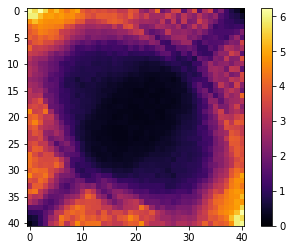

In [6]:
N=41
fig, ax = plt.subplots()
c=ax.imshow(susc_phys_all, interpolation=None, cmap=plt.get_cmap('inferno'))
fig.colorbar(c)
plt.show()

<Figure size 432x288 with 0 Axes>

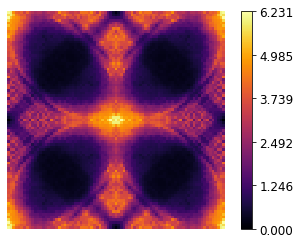

kz = 0 , U/Uc = 0.995


In [7]:
#full BZ inlcuding the edges

newlistfull = []
for k in range((N-1)*2+1):
    sublist = []
    if k<N:
        for m in range((N-1)*2+1):
            if m<N:
                sublist.append(susc_phys_all[(N-1)-k][(N-1)-m])
            else:
                sublist.append(susc_phys_all[(N-1)-k][m-(N-1)])
    else:
        for m in range((N-1)*2+1):
            if m<N:
                sublist.append(susc_phys_all[k-(N-1)][(N-1)-m])
            else:
                sublist.append(susc_phys_all[k-(N-1)][m-(N-1)])
    newlistfull.append(sublist)

newlistfull = np.array(newlistfull, dtype=float)
newlistfull = newlistfull+0.000000001

bz = plt.figure()
bz, ax = plt.subplots()
c=ax.imshow(newlistfull, interpolation=None, cmap=plt.get_cmap('inferno'))
plt.axis('off')
plt.gca().xaxis.tick_bottom()
plt.hlines(y=0., xmin=0.0, xmax=0.5, color='w', linestyle='dashed', alpha=0.2)

minval = np.amin(np.real(newlistfull))
maxval = np.amax(np.real(newlistfull))
t_list2 = minval + np.linspace(0., 1., num=6)*(maxval-minval)

cbar = fig.colorbar(c, ax=ax, ticks=t_list2, orientation="vertical")
cbar.ax.set_yticklabels(t_list2)
cbar.ax.tick_params(labelsize=12)
c.set_clim(minval, maxval)

plt.show()
print('kz =', kz, ', U/Uc =', UoverUc)

In [18]:
#bz.savefig('2Dcut_final_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_Uc='+str(UoverUc)+'_JUratio='+str(JUratio)+'_UoverUc='+str(UoverUc)+'.png', bbox_inches='tight', dpi=2000)

In [19]:
import csv
with open('2Dcut_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_Uc='+str(UoverUc)+'_JUratio='+str(JUratio)+'_UoverUc='+str(UoverUc)+'.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(np.array(newlistfull))

### Gaussian fitting

In [448]:
cf=20
xcut = (1/80)*np.linspace(0,40, num=41)+0.25
GXG = newlistfull[40][cf:-cf]
MXM = np.transpose(newlistfull)[40][cf:-cf]

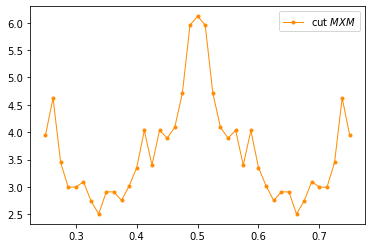

In [487]:
xData1 = xcut
yData1 = MXM
lcutfit = plt.figure()
ax = lcutfit.add_subplot( 1, 1, 1 )
ax.plot(xData, yData1, marker = 'o', markersize = 3, linestyle = '-', linewidth = 1.,  color = 'darkorange')
plt.legend([r'cut $MXM$', r'multiple Lorentzian fit'])

plt.show()

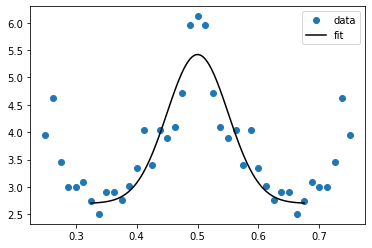

In [505]:
n0=6
xData0 = xcut
yData0 = MXM
xdata = xcut[n0:-n0]
ydata = MXM[n0:-n0]
x0=0.5
y0=2.7
# Define the Gaussian function
def Gauss1(x, A, B):
#def Gauss(x, A, B, y0):
    y = A*np.exp(-1*B*(x-x0)**2) + y0
    return y
parameters, covariance = curve_fit(Gauss1, xdata, ydata)
  
fit_A1 = parameters[0]
fit_B1 = parameters[1]
# fit_y0 = parameters[2]
  
fit_y = Gauss1(xdata, fit_A1, fit_B1)
#fit_y = Gauss(xdata, fit_A, fit_B, fit_y0)
plt.plot(xData0, yData0, 'o', label='data')
xrange=np.linspace(xData0[n0],1-xData0[n0],100)
Gaussyrange = Gauss1(xrange, fit_A1, fit_B1)
plt.plot(xrange, Gaussyrange, '-', label='fit', c='k')
#plt.plot(xrange, Gauss(xrange, fit_A, fit_B, fit_y0), '-', label='fit')
plt.legend()
plt.show()

0.1166666666666667


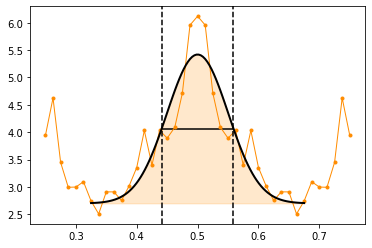

In [506]:
lcutfit = plt.figure()
ax = lcutfit.add_subplot( 1, 1, 1 )
ax.plot(xData0, yData0, marker = 'o', markersize = 3, linestyle = '-', linewidth = 1.,  color = 'darkorange')
ax.plot(xrange, Gaussyrange, '-', label='fit', color='k',  linewidth = 2)

hM = (max(Gaussyrange)+min(Gaussyrange))/2
xM=xrange[min(range(len(Gaussyrange)), key=lambda i: abs(Gaussyrange[i]-hM))]
ax.fill_between(x= xrange, y1= Gaussyrange, y2=y0, color= "darkorange",  alpha= 0.2)

ax.hlines(y=hM, xmin=xM, xmax=1-xM, color='k', ls='-')
ax.axvline(x=xM, color='k', ls='--')
ax.axvline(x=1-xM, color='k', ls='--')

r1=2*np.abs(xM-0.5)
print(r1)
plt.show()
#lcutfit.savefig('lcutMXM_0.05-X_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_Uc='+str(UoverUc)+'_JUratio='+str(JUratio)+'_UoverUc='+str(UoverUc)+'.png', bbox_inches='tight', dpi=2000)

In [507]:
xData01 = xData0
yData01 = yData0
xrange1 = xrange
Gaussyrange1 = Gaussyrange
hM1 = hM
xM1 = xM
y01 = y0

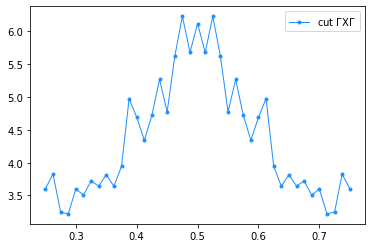

In [508]:
xData = xcut
yData1 = GXG
lcutfit = plt.figure()
ax = lcutfit.add_subplot( 1, 1, 1 )
ax.plot( xData, yData, marker = 'o', markersize = 3, linestyle = '-', linewidth = 1.,  color = 'dodgerblue')
plt.legend([r'cut $\Gamma$X$\Gamma$', r'multiple Lorentzian fit'])

plt.show()

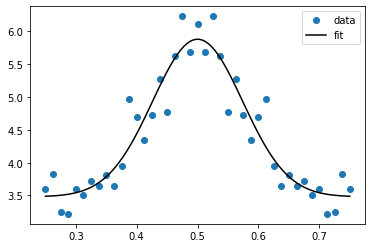

In [532]:
xData0 = xcut
yData0 = GXG
xdata = xcut
ydata = GXG
x0=0.5

#def Gauss(x, A, B):
def Gauss(x, A, B, y0):
    y = A*np.exp(-1*B*(x-x0)**2) + y0
    return y
parameters, covariance = curve_fit(Gauss, xdata, ydata)

fit_A = parameters[0]
fit_B = parameters[1]
fit_y0 = parameters[2]
  
#fit_y = Gauss(xdata, fit_A, fit_B)
fit_y = Gauss(xdata, fit_A, fit_B, fit_y0)
plt.plot(xData0, yData0, 'o', label='data')
xrange=np.linspace(xData0[0],1-xData0[0],100)
Gaussyrange = Gauss(xrange, fit_A, fit_B,fit_y0)
plt.plot(xrange, Gaussyrange, '-', label='fit', c='k')
#plt.plot(xrange, Gauss(xrange, fit_A, fit_B, fit_y0), '-', label='fit')
plt.legend()
plt.show()

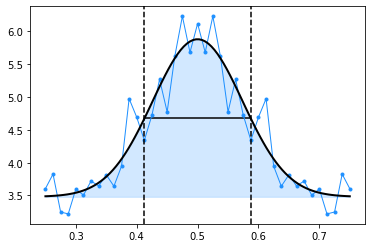

0.17676767676767668


In [533]:
lcutfit = plt.figure()
ax = lcutfit.add_subplot( 1, 1, 1 )
ax.plot(xData0, yData0, marker = 'o', markersize = 3, linestyle = '-', linewidth = 1.,  color = 'dodgerblue')
ax.plot(xrange, Gaussyrange, '-', label='fit', color='k',  linewidth = 2)

hM = (max(Gaussyrange)+min(Gaussyrange))/2
xM=xrange[min(range(len(Gaussyrange)), key=lambda i: abs(Gaussyrange[i]-hM))]
ax.fill_between(x= xrange, y1= Gaussyrange, y2=fit_y0, color= "dodgerblue",  alpha= 0.2)

ax.hlines(y=hM, xmin=xM, xmax=1-xM, color='k', ls='-')
ax.axvline(x=xM, color='k', ls='--')
ax.axvline(x=1-xM, color='k', ls='--')

#print(2*np.abs(xM-0.5))
plt.show()
#lcutfit.savefig('lcutMXM_0.05-X_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_Uc='+str(UoverUc)+'_JUratio='+str(JUratio)+'_UoverUc='+str(UoverUc)+'.png', bbox_inches='tight', dpi=2000)


# yData1 = yData
# lcutfit = plt.figure()
# ax = lcutfit.add_subplot( 1, 1, 1 )
# ax.plot(xData0, yData0, marker = 'o', markersize = 3, linestyle = '-', linewidth = 1.,  color = 'dodgerblue')
# ax.plot(xrange, Gauss(xrange, fit_A, fit_B), '-', label='fit', color='k',  linewidth = 2)
# #ax.axvline(x=0.418, color='gray', ls='--')
# #ax.axvline(x=0.5, color='gray', ls='--')
# #plt.legend([r'cut $\Gamma$X$\Gamma$', r'multiple Lorentzian fit'])

# # hM = (max(testData1)+min(testData1))/2
# # xM=xcut[min(range(len(testData1)), key=lambda i: abs(testData1[i]-hM))]
# ax.fill_between(x= xrange, y1= Gauss(xrange, fit_A, fit_B), y2=2.5, color= "dodgerblue",  alpha= 0.2)

# # ax.hlines(y=hM, xmin=xM, xmax=1-xM, color='k', ls='-')
# # ax.axvline(x=xM, color='k', ls='--')
# # ax.axvline(x=1-xM, color='k', ls='--')

r2=2*np.abs(xM-0.5)
print(r2)
# plt.show()
# #lcutfit.savefig('lcutMXM_0.05-X_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_Uc='+str(UoverUc)+'_JUratio='+str(JUratio)+'_UoverUc='+str(UoverUc)+'.png', bbox_inches='tight', dpi=2000)

In [534]:
xData02 = xData0
yData02 = yData0
xrange2 = xrange
Gaussyrange2 = Gaussyrange
hM2 = hM
xM2 = xM
y02 = fit_y0

In [535]:
Gaussyrange = Gauss1(xrange2, fit_A1, fit_B1)

$\eta = \frac{r^2-1}{r^2+1}$

In [536]:
r=r1/r2
print(r)
eta=(r**2-1)/(r**2+1)
print(eta)

0.6600000000000005
-0.3931457230426296


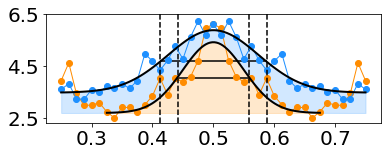

In [537]:
comb = plt.figure(1, figsize = [6,2])
ax = comb.add_subplot( 1, 1, 1 )
ax.plot(xData01, yData01, marker = 'o', markersize = 6, linestyle = '-', linewidth = 1.,  color = 'darkorange')
ax.plot(xrange1, Gaussyrange1, '-', label='fit', color='k',  linewidth = 2)
ax.fill_between(x= xrange1, y1= Gaussyrange1, y2=y01, color= "darkorange",  alpha= 0.2)
ax.hlines(y=hM1, xmin=xM1, xmax=1-xM1, color='k', ls='-')
ax.axvline(x=xM1, color='k', ls='--')
ax.axvline(x=1-xM1, color='k', ls='--')

ax.plot(xData02, yData02, marker = 'o', markersize = 6, linestyle = '-', linewidth = 1.,  color = 'dodgerblue')
ax.plot(xrange2, Gaussyrange2, '-', label='fit', color='k',  linewidth = 2)
ax.fill_between(x= xrange2, y1= Gaussyrange, y2=Gaussyrange2, color= "dodgerblue",  alpha= 0.2)
ax.hlines(y=hM2, xmin=xM2, xmax=1-xM2, color='k', ls='-')
ax.axvline(x=xM2, color='k', ls='--')
ax.axvline(x=1-xM2, color='k', ls='--')
ax.set_yticks([2.5,4.5,6.5] , minor=False)

for t in ax.get_yticklabels():
    t.set_fontsize(20)
    
for t in ax.get_xticklabels():
    t.set_fontsize(20)
    
plt.show()

comb.savefig('cutsX_fil='+str(fil)+'_omega='+str(omega)+'_z='+str(kz)+'_Uc='+str(UoverUc)+'_JUratio='+str(JUratio)+'_UoverUc='+str(UoverUc)+'.png', bbox_inches='tight', dpi=2000)